In [1]:
import numpy as np
from PIL import Image, ImageOps
from typing import Literal

class Tile:
    img: Image.Image = None
    # img.mode -> "RGB" TILE | "L" MASK
    
    @staticmethod
    def from_path(path: str) -> "Tile":
        tile = Tile()
        tile.img = Image.open(path)
        return tile
    
    @staticmethod
    def from_image(image: Image) -> "Tile":
        tile = Tile()
        tile.img = image
        return tile
    
    @staticmethod
    def from_array(array: np.array) -> "Tile":
        tile = Tile()
        tile.img = Image.fromarray(array)
        return tile
    
    @property
    def as_mask(self) -> "Tile":
        return Tile.from_image(self.img.convert('L'))
    
    @property
    def as_array(self) -> np.ndarray:
        return np.array(self.img)
    
    @staticmethod
    def combine(base: "Tile", over: "Tile", mask: "Tile" = None, alpha: float = 0.5) -> "Tile":
        if mask is None:
            img = Image.blend(base.img, over.img, alpha)
            return Tile.from_image(img)
        
        img = Image.composite(base.img, over.img, mask.img)
        return Tile.from_image(img)
    
    @staticmethod
    def combine_masks(*masks: "Tile") -> "Tile":
        base = masks[0].as_array
        for mask in masks[1:]:
            base |= mask.as_array
        return Tile.from_array(base)
    
    def rotate(self, degrees: int) -> "Tile":
        if degrees % 90 == 0:
            img = self.img.rotate(degrees)
            return Tile.from_image(img)
        
        if degrees % 45 == 0:
            wdt, hgt = self.img.size
            img = self.img.rotate(degrees, expand=True).resize((wdt*2, hgt))
            # img = img.crop((1, 0, 2*wdt-1, hgt))
            return Tile.from_image(img)
        
        return self
    
    def mirror(self, how: Literal["|", "-"]) -> "Tile":
        if how == "|":
            img = ImageOps.mirror(self.img)
        if how == "-":
            img = ImageOps.flip(self.img)
        return Tile.from_image(img)
    
    def scale(self, factor: float, how = None) -> "Tile":
        how = how if how is not None else Image.Resampling.NEAREST
        return Tile.from_image(ImageOps.scale(self.img, factor, how))

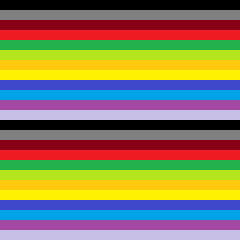

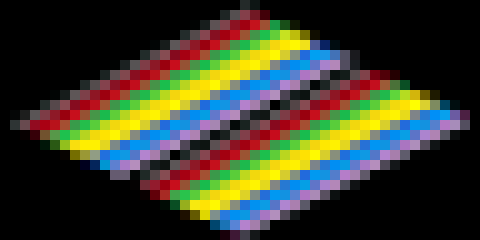

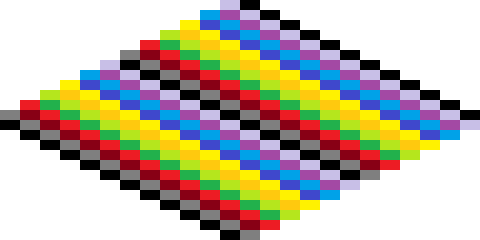

In [2]:
tile = Tile.from_path("imgs/orto24_data.png")
display(tile.scale(10).img)
display(tile.rotate(45).scale(10).img)
# display(tile.rotate(45).mirror("|").scale(10).img)
# display(tile.mirror("|").rotate(45).scale(10).img)
display(Tile.from_path("imgs/iso24_data.png").mirror('-').scale(10).img)